# New section

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
b=plt.imread('ssn.jpeg')

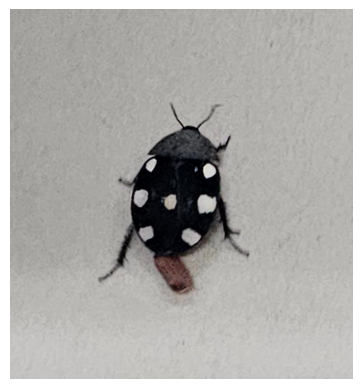

In [ ]:
plt.imshow(b)
plt.axis('off')
plt.show()

In [ ]:
#!pip install tensorflow-gpu==2.5.0
!pip show tensorflow-gpu

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
cnn=tf.keras.models.Sequential()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [ ]:
cnn.summary()

NameError: name 'cnn' is not defined

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image=cv2.imread("ssn.jpeg")

In [ ]:
BGR_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [ ]:
type(image)


numpy.ndarray

In [ ]:
image.shape

(1508, 1397, 3)

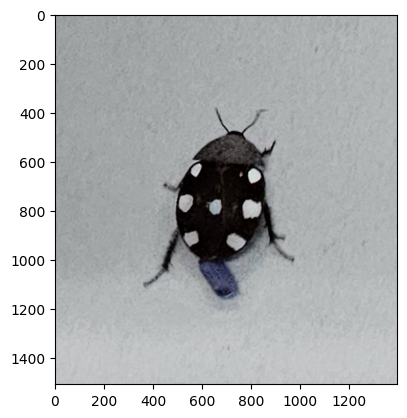

In [ ]:
plt.imshow(image)

In [ ]:
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


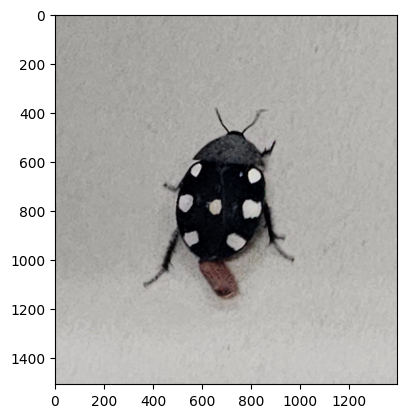

In [ ]:
plt.imshow(new_image)

In [ ]:
"""
1. Splitting image channels
"""
r,g,b=cv2.split(new_image)
""""print('r', r.shape)
print('g', g.shape)
print('b', b.shape)"""
new_image=cv2.merge((r,g,b))

In [ ]:
"""
2. Resize of images
"""
s=10
w=int(new_image.shape[1]*s/100)
h=int(new_image.shape[0]*s/100)
dim=(w,h)
re_size=cv2.resize(new_image, dim, interpolation = cv2.INTER_AREA)
re_size.shape

(150, 139, 3)

In [ ]:
"""
3. Rotate Operation
"""
(h, w)=new_image.shape[:2]
c=(w/2, h/2)
angle=90
m=cv2.getRotationMatrix2D(c, angle, 1.0)
rotate_90=cv2.warpAffine(new_image, m, (h,w))

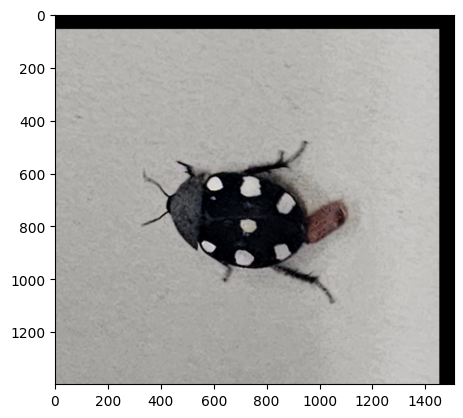

In [ ]:
plt.imshow(rotate_90)

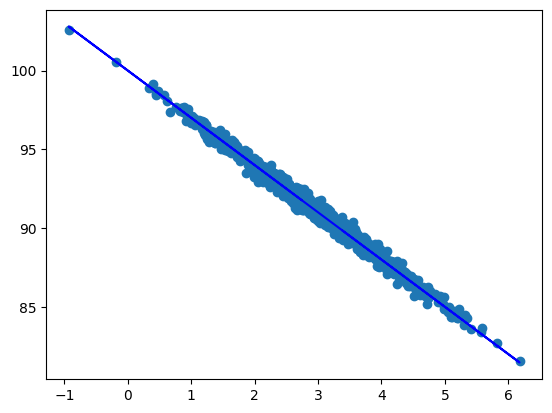

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=np.random.normal(3,1,1000)
y=100-(x+np.random.normal(0,0.1,1000))*3
plt.scatter(x,y)
def predict(x):
  return -3*x+100
fitline=predict(x)
plt.plot(x,fitline,c='b')
plt.show()

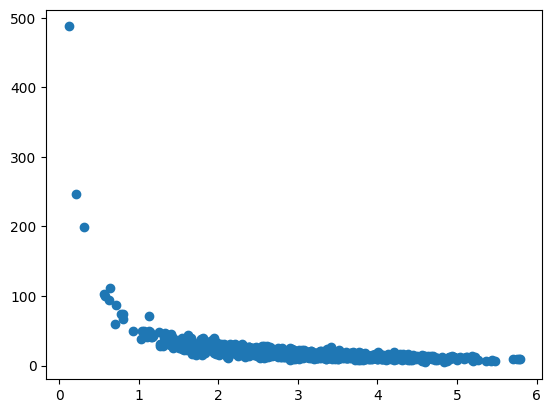

In [ ]:
%matplotlib inline
from pylab import *
import numpy as np
np.random.seed(4)
x=np.random.normal(3.0,1.0,1000)
y=np.random.normal(50.0,10.0,1000)/x
plt.scatter(x,y)

In [ ]:
# Install necessary libraries
!pip install tensorflow matplotlib

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load the MobileNetV2 model pre-trained on ImageNet
model = tf.keras.applications.MobileNetV2(weights='imagenet')

# Function to preprocess the image and predict
def process_and_predict(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    return decoded_predictions

# Load the reference insect image (insect already in the system)
reference_image_path = 'ssn.jpeg'
reference_prediction = process_and_predict(reference_image_path)

# Output predictions for the reference image
print(f"Reference Image Predictions: {reference_prediction}")

# Load the given image to check for the insect
given_image_path = '/content/64007.jpg'
given_prediction = process_and_predict(given_image_path)

# Output predictions for the given image
print(f"Given Image Predictions: {given_prediction}")

# Check if the insect in reference image is present in the given image
insect_found = False
for ref_pred in reference_prediction:
    for given_pred in given_prediction:
        if ref_pred[1] == given_pred[1]:
            insect_found = True
            print(f"Insect '{ref_pred[1]}' found in the given image!")

if not insect_found:
    print("Insect not found in the given image.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Reference Image Predictions: [('n02169497', 'leaf_beetle', 0.2025399), ('n02167151', 'ground_beetle', 0.12534997), ('n02165456', 'ladybug', 0.10009962)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Given Image Predictions: [('n02277742', 'ringlet', 0.3866031), ('n02281787', 'lycaenid', 0.2999922), ('n02276258', 'admiral', 0.14625305)]
Insect not found in the given image.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
n=plt.imread('/content/ssn.jpeg')

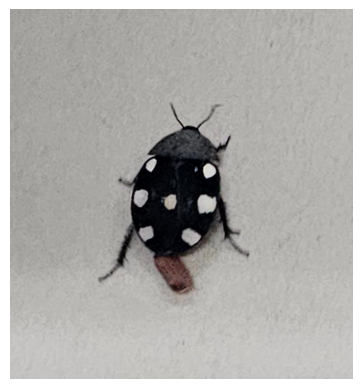

In [ ]:
plt.imshow(n)
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow.keras

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os

In [ ]:
data_transforms={
    'train':transforms.Compose([
        transforms.RandomResizedCrop(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229,0.224,0.225])
    ]),
    'val':transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
# Install necessary libraries
!pip install tensorflow matplotlib

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load the MobileNetV2 model pre-trained on ImageNet
model = tf.keras.applications.MobileNetV2(weights='imagenet')

# Function to preprocess the image and predict
def process_and_predict(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    return decoded_predictions

# Load the reference insect image (insect already in the system)
reference_image_path = '/content/64007.jpg'
reference_prediction = process_and_predict(reference_image_path)

# Output predictions for the reference image
print(f"Reference Image Predictions: {reference_prediction}")

# Load the given image to check for the insect
given_image_path = '/content/ssn.jpeg'
given_prediction = process_and_predict(given_image_path)

# Output predictions for the given image
print(f"Given Image Predictions: {given_prediction}")

# Check if the insect in reference image is present in the given image
insect_found = False
for ref_pred in reference_prediction:
    for given_pred in given_prediction:
        if ref_pred[1] == given_pred[1]:
            insect_found = True
            print(f"Insect '{ref_pred[1]}' found in the given image!")

if not insect_found:
    print("Insect not found in the given image.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Reference Image Predictions: [('n02277742', 'ringlet', 0.3866031), ('n02281787', 'lycaenid', 0.2999922), ('n02276258', 'admiral', 0.14625305)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Given Image Predictions: [('n02169497', 'leaf_beetle', 0.2025399), ('n02167151', 'ground_beetle', 0.12534997), ('n02165456', 'ladybug', 0.10009962)]
Insect not found in the given image.


In [ ]:
# Install the required libraries
!pip install torch torchvision matplotlib

# Clone YOLOv5 repository and install dependencies
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!pip install -r requirements.txt  # install dependencies

# Import libraries
import torch
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

# Load pre-trained YOLOv5 model (YOLOv5s - small version)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load the image where you want to detect the insect
img_path = '/content/ssn.jpeg'  # Replace with the path to your image
img = Image.open(img_path)

# Perform object detection
results = model(img)

# Plot the results
results.show()

# You can also get the detection results
print(results.pandas().xyxy[0])  # prints the bounding box coordinates and labels


In [ ]:
# Install OpenCV if not already installed
!pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img1 = cv2.imread('/content/64007.jpg', 0)  # Query image (the small image)
img2 = cv2.imread('/content/ssn.jpeg', 0) # Training image (the large image)

# Initialize ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors with ORB in both images
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher (Brute Force Matcher) object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort the matches based on distance (lower distance means better match)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the top matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the matches
plt.figure(figsize=(12,6))
plt.imshow(img_matches)
plt.title('Top matches between 64007.jpg and nivii.jpeg')
plt.show()

# Threshold to count matches
threshold = 10  # You can adjust the threshold based on the images

if len(matches) > threshold:
    print("The picture '64007.jpg' is likely present in 'nivii.jpeg'.")
else:
    print("The picture '64007.jpg' is not found in 'nivii.jpeg'.")


The picture '64007.jpg' is likely present in 'nivii.jpeg'.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 64007.jpg to 64007.jpg


In [ ]:
# Load images
img1 = cv2.imread('/content/64007.jpg', 0)  # Query image (the small image)
img2 = cv2.imread('/content/ssn.jpeg', 0) # Training image (the large image)

# Check if images are loaded properly
if img1 is None:
    print("Error loading '64007.jpg'")
if img2 is None:
    print("Error loading 'nivii.jpeg'")


In [ ]:
# Import necessary modules
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload the images from your local drive
uploaded = files.upload()

# Load images
img1 = cv2.imread('/content/64007.jpg', 0)  # Query image (the small image)
img2 = cv2.imread('/content/ssn.jpeg', 0) # Training image (the large image)

# Check if images are loaded properly
if img1 is None:
    print("Error loading '64007.jpg'")
if img2 is None:
    print("Error loading 'ssn.jpeg'")

# Initialize ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors with ORB in both images
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher (Brute Force Matcher) object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort the matches based on distance (lower distance means better match)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the top matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the matches
plt.figure(figsize=(12,6))
plt.imshow(img_matches)
plt.title('Top matches between 64007.jpg and ssn.jpeg')
plt.show()

# Threshold to count matches
threshold = 10  # You can adjust the threshold based on the images

if len(matches) > threshold:
    print("The picture '64007.jpg' is likely present in 'ssn.jpeg'.")
else:
    print("The picture '64007.jpg' is not found in 'ssn.jpeg'.")


In [ ]:
# Install necessary libraries
!pip install opencv-python keras tensorflow

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Load images
img_large = cv2.imread('/content/ssn.jpeg', 0)  # Larger image (background)
img_small = cv2.imread('/content/64007.jpeg', 0)   # Smaller image (template)

# Check the dimensions of both images
print("Large image shape:", img_large.shape)
print("Small image shape:", img_small.shape)

# Ensure that the small image is smaller than or equal to the large image
if img_small.shape[0] > img_large.shape[0] or img_small.shape[1] > img_large.shape[1]:
    print("Error: The small image is larger than the large image. Resizing the small image.")
    # Resize the small image to fit within the large image
    scale_percent = 50  # Scale down the image to 50% of its original size (adjust as needed)
    width = int(img_small.shape[1] * scale_percent / 100)
    height = int(img_small.shape[0] * scale_percent / 100)
    img_small = cv2.resize(img_small, (width, height))

# --- Step 1: Basic Template Matching using OpenCV ---
def template_matching(img_large, img_small):
    # Perform template matching
    res = cv2.matchTemplate(img_large, img_small, cv2.TM_CCOEFF_NORMED)

    # Find the best match location
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Draw rectangle on best match
    top_left = max_loc
    h, w = img_small.shape
    bottom_right = (top_left[0] + w, top_left[1] + h)

    matched_image = cv2.rectangle(img_large.copy(), top_left, bottom_right, 255, 2)

    plt.figure(figsize=(10, 5))
    plt.title('Template Matching Result')
    plt.imshow(matched_image, cmap='gray')
    plt.show()

    print(f"Max matching value: {max_val}")

    # Threshold for matching
    if max_val > 0.7:  # Adjust the threshold based on accuracy needs
        print("The small image is found in the large image!")
    else:
        print("No strong match found.")

# --- Step 2: Deep Learning Feature Matching (Using VGG16 Pretrained Model) ---
def get_image_features(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    # Extract features using the model
    features = model.predict(img_data)
    return features

# Load VGG16 model (without the top classification layer)
vgg_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=vgg_model.input, outputs=vgg_model.layers[-1].output)

def deep_learning_similarity(small_image_path, large_image_path):
    # Extract deep features from both images
    small_image_features = get_image_features(small_image_path, model)
    large_image_features = get_image_features(large_image_path, model)

    # Compute similarity using cosine similarity
    from numpy.linalg import norm

    small_image_vector = small_image_features.flatten()
    large_image_vector = large_image_features.flatten()

    # Cosine similarity
    cosine_similarity = np.dot(small_image_vector, large_image_vector) / (norm(small_image_vector) * norm(large_image_vector))

    print(f"Deep learning similarity score: {cosine_similarity}")

    if cosine_similarity > 0.8:  # Threshold for similarity
        print("The small image is likely present in the large image based on deep features!")
    else:
        print("The small image is not found in the large image based on deep features.")

# Run Template Matching
template_matching(img_large, img_small)

# Run Deep Learning Feature Matching
deep_learning_similarity('/content/64007.jpeg', '/content/ssn.jpeg')


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 16.corn_earworm_facts1.jpg to 16.corn_earworm_facts1.jpg


In [ ]:
# Load images
img_large = cv2.imread('/nivii.jpeg', 0)  # Larger image (background)
img_small = cv2.imread('/64007.jpg', 0)   # Smaller image (template)

# Check if images are loaded properly
if img_large is None:
    print("Error: 'nivii.jpeg' could not be loaded.")
else:
    print("Successfully loaded '/nivii.jpeg'.")

if img_small is None:
    print("Error: '64007.jpg' could not be loaded.")
else:
    print("Successfully loaded '/64007.jpg'.")


Successfully loaded '/nivii.jpeg'.
Successfully loaded '/64007.jpg'.


In [ ]:
# Import necessary libraries
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload the images from your local drive
uploaded = files.upload()

# Load images
img_large = cv2.imread('/nivii.jpeg', 0)  # Larger image (background)
img_small = cv2.imread('/64007.jpg', 0)   # Smaller image (template)

# Check if images are loaded properly
if img_large is None:
    raise ValueError("Error: 'nivii.jpeg' could not be loaded. Check the file name or upload the image.")
if img_small is None:
    raise ValueError("Error: '64007.jpg' could not be loaded. Check the file name or upload the image.")

print("Images loaded successfully.")

# --- Continue with your image processing ---
# Ensure that the small image is smaller than or equal to the large image
if img_small.shape[0] > img_large.shape[0] or img_small.shape[1] > img_large.shape[1]:
    print("The small image is larger than the large image. Resizing the small image.")
    # Resize the small image to fit within the large image
    scale_percent = 50  # Scale down the image to 50% of its original size
    width = int(img_small.shape[1] * scale_percent / 100)
    height = int(img_small.shape[0] * scale_percent / 100)
    img_small = cv2.resize(img_small, (width, height))

# Continue with template matching or deep learning similarity as before


Saving 1.corn_earworm.JPG to 1.corn_earworm (1).JPG
Images loaded successfully.


In [ ]:
!pip install opencv-python scikit-image


In [ ]:
import cv2
from skimage.metrics import structural_similarity as ssim
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load two images
image1 = cv2.imread('/nivii.jpeg')
image2 = cv2.imread('/64007.jpg')

# Convert them to grayscale for comparison
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


In [ ]:
def mse(imageA, imageB):
    # The 'Mean Squared Error' between the two images is the sum of the squared differences between the two images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err


In [ ]:
def compare_images(imageA, imageB):
    # Compute MSE
    mse_value = mse(imageA, imageB)

    # Compute SSIM
    ssim_value = ssim(imageA, imageB)

    print(f"MSE: {mse_value}")
    print(f"SSIM: {ssim_value}")
    return mse_value, ssim_value
